In [5]:
# Install and import necessary packages
!pip install pandas scipy statsmodels openpyxl
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
ipl_data = pd.read_csv(
    "C:/Users/nihar/OneDrive/Desktop/Bootcamp/SCMA 632/Assignments/A1b/IPL_ball_by_ball_updated till 2024.csv", 
    low_memory=False
)

In [11]:
# Display column names to verify them
print(ipl_data.columns)

Index(['Match id', 'Date', 'Season', 'Batting team', 'Bowling team',
       'Innings No', 'Ball No', 'Bowler', 'Striker', 'Non Striker',
       'runs_scored', 'extras', 'type of extras', 'score', 'score/wicket',
       'wicket_confirmation', 'wicket_type', 'fielders_involved',
       'Player Out'],
      dtype='object')


In [15]:
# Aggregate data season-wise, batsman-wise, and bowler-wise
ipl_summary = ipl_data.groupby(['Season', 'Match id', 'Striker', 'Bowler']).agg(
    total_runs=('runs_scored', 'sum'),
    total_wickets=('wicket_confirmation', 'sum')
).reset_index()


In [17]:
# Top three run-getters and top three wicket-takers per season
top_players_per_season = ipl_summary.groupby('Season').apply(
    lambda x: pd.DataFrame({
        'top_run_getters': [x.nlargest(3, 'total_runs')],
        'top_wicket_takers': [x.nlargest(3, 'total_wickets')]
    })
).reset_index()

In [19]:
# Filter data for the last three IPL tournaments
last_three_seasons = ipl_data[ipl_data['Season'].isin(ipl_data['Season'].unique()[-3:])]


In [21]:
# Get top three batsmen based on total runs
top_batsmen = last_three_seasons.groupby('Striker')['runs_scored'].sum().nlargest(3).reset_index()


In [23]:
# Get top three bowlers based on total wickets
top_bowlers = last_three_seasons.groupby('Bowler')['wicket_confirmation'].sum().nlargest(3).reset_index()


In [25]:
# Extract the data for top batsmen and bowlers
top_batsmen_runs = last_three_seasons[last_three_seasons['Striker'].isin(top_batsmen['Striker'])]['runs_scored']
top_bowlers_wickets = last_three_seasons[last_three_seasons['Bowler'].isin(top_bowlers['Bowler'])]['wicket_confirmation']

In [27]:
# Function to fit and plot distribution
def fit_and_plot_distribution(data):
    fit = stats.norm.fit(data)
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, *fit)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (fit[0], fit[1])
    plt.title(title)
    plt.show()
    return fit

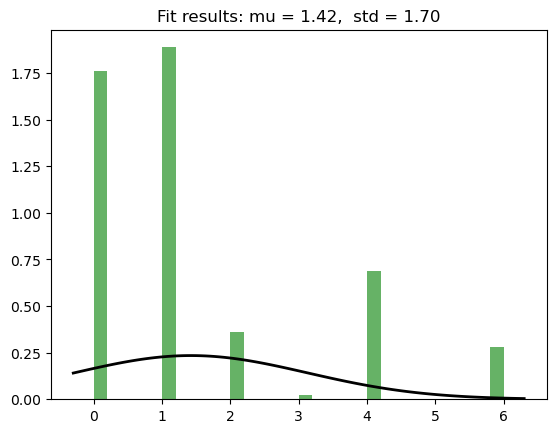

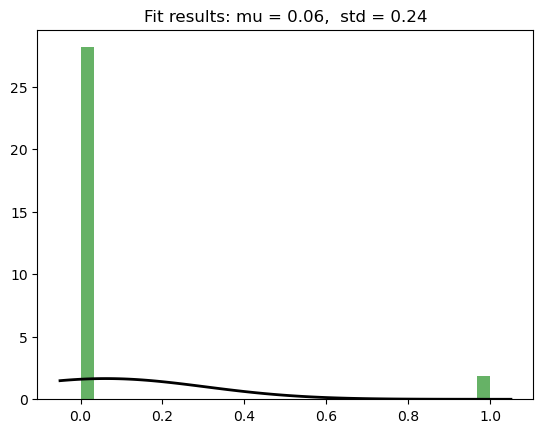

In [29]:
# Fit distributions for top batsmen and bowlers
fit_batsmen = fit_and_plot_distribution(top_batsmen_runs)
fit_bowlers = fit_and_plot_distribution(top_bowlers_wickets)

In [31]:
# Print summary of fitted distributions
print(f"Top Batsmen Distribution: mu = {fit_batsmen[0]}, std = {fit_batsmen[1]}")
print(f"Top Bowlers Distribution: mu = {fit_bowlers[0]}, std = {fit_bowlers[1]}")


Top Batsmen Distribution: mu = 1.420077681505826, std = 1.7012772912760035
Top Bowlers Distribution: mu = 0.06190643686246922, std = 0.24098553885547225


In [33]:
# Filter data for SP Narine
narine_data = ipl_data[(ipl_data['Striker'] == 'SP Narine') | (ipl_data['Bowler'] == 'SP Narine')]


In [35]:
# Load the salary dataset
salary_data = pd.read_excel("C://Users//nihar//OneDrive//Desktop//Bootcamp//SCMA 632//Assignments//A1b//IPL SALARIES 2024.xlsx")


In [37]:
# Filter the salary data for SP Narine
narine_salary = salary_data[salary_data['Player'].str.contains("Sunil Narine", na=False)]


In [39]:
# Manually create the salary data for SP Narine
seasons = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]
salaries = [600] * len(seasons)
narine_salary = pd.DataFrame({
    'Player': ['Sunil Narine'] * len(seasons),
    'Season': seasons,
    'Salary': salaries
})


In [ ]:
# Summarize performance metrics for SP Narine
narine_performance = narine_data.groupby('Season').agg(
    total_runs=('runs_scored', lambda x: x[narine_data['Striker'] == 'SP Narine'].sum()),
    total_wickets=('wicket_confirmation', lambda x: x[narine_data['Bowler'] == 'SP Narine'].sum())
).reset_index()
